# Notebook for plotting results of filtering with noise

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

module_path = os.path.abspath(os.path.join('../..'))
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 11, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)

figure_path = module_path + '/figures/'

def get_plotable_arrays(result_dict):
    noise = []
    clf_dict = {k : [] for k in result_dict[list(result_dict.keys())[0]].keys()}
    for n, subdict in result_dict.items():
        noise.append(n)
        for clf, res in subdict.items():
            clf_dict[clf].append(res)
    return noise, clf_dict

def plot_dict(d, percentage_x_axis = False):
    f, ax = plt.subplots() # 1 x 1 array , can also be any other size
    f.set_size_inches(3, 2)

    colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
    color_idx = 0
    for label, result_dict in d.items():
        n, c = get_plotable_arrays(result_dict)
        if percentage_x_axis:
            n = 1.0/(np.array(n).astype(float))
        ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
        color_idx = color_idx + 2
    for label in ax.get_yticklabels() :
        label.set_fontproperties(font_small)
    for label in ax.get_xticklabels() :
        label.set_fontproperties(font_small)

    for child in ax.get_children():
        if isinstance(child, matplotlib.text.Text):
            child.set_fontproperties(font_small)

    ax.legend(bbox_to_anchor=(1.1, 1.05), prop = font)
    
    return f, ax



# Plotting AUC score simulated data

In [2]:
a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_lr_amplitude.pkl', 'rb')
simulated_data_original_amplitude = pickle.load(a_file)
simulated_data_lr_amplitude = pickle.load(a_file)
simulated_data_lr_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_lr_amount.pkl', 'rb')
simulated_data_original_amount = pickle.load(a_file)
simulated_data_lr_amount = pickle.load(a_file)
simulated_data_lr_amount_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_cluster_amplitude.pkl', 'rb')
_ = pickle.load(a_file)
simulated_data_clustering_amplitude = pickle.load(a_file)
simulated_data_clustering_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/simulated_cluster_amount.pkl', 'rb')
_ = pickle.load(a_file)
simulated_data_clustering_amount = pickle.load(a_file)
simulated_data_clustering_amount_removed = pickle.load(a_file)


results_amplitude = {
    'Cluster filter' : simulated_data_clustering_amplitude,
    'LR filter': simulated_data_lr_amplitude,
    'Original': simulated_data_original_amplitude
}

results_amount = {
    'Cluster filter' : simulated_data_clustering_amount,
    'LR filter': simulated_data_lr_amount,
    'Original': simulated_data_original_amount
}

results_removed_amount_of_data_amplitude_noise = {
    'Cluster filter' :  simulated_data_clustering_amplitude_removed, 
    'LR filter' : simulated_data_lr_amplitude_removed
}


results_removed_amount_of_data_amount_noise = {
    'Cluster filter' : simulated_data_clustering_amount_removed,
    'LR filter' : simulated_data_lr_amount_removed
}

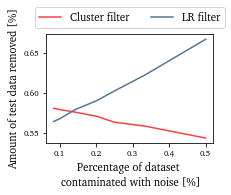

In [3]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_removed_amount_of_data_amount_noise.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Percentage of dataset \n contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'simulated_higher_amount_noise_removed.pdf', bbox_inches='tight')

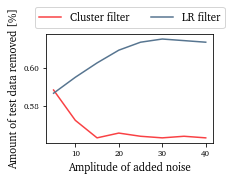

In [4]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_removed_amount_of_data_amplitude_noise.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)
f.savefig(figure_path + 'simulated_higher_amplitude_noise_removed.pdf', bbox_inches='tight')

## Plotting results of adding noise with a higher amplitude

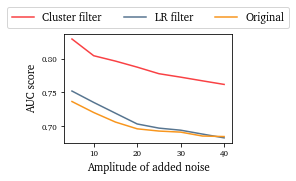

In [5]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amplitude.items():
    n, c = get_plotable_arrays(result_dict)
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)

f.savefig(figure_path + 'simulated_data_higher_amplitude_noise.pdf', bbox_inches='tight')

## Plotting results of adding more noise

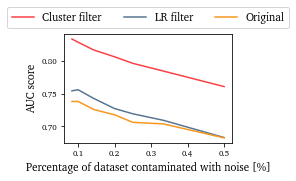

In [6]:
f, ax = plt.subplots() # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
color_idx = 0
for label, result_dict in results_amount.items():
    n, c = get_plotable_arrays(result_dict)
    n = 1.0/(np.array(n).astype(float))
    ax.plot(n, c['knnOptimal'], label = label, c = colors[color_idx])
    color_idx = color_idx + 2

ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Percentage of dataset contaminated with noise [%]', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font_small)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, prop = font)

f.savefig(figure_path + 'simulated_data_more_noise.pdf', bbox_inches='tight')

# Lung sound dataset - preproject feature extraction

In [2]:
a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_lr_amplitude.pkl', 'rb')
lung_original_amplitude = pickle.load(a_file)
lung_lr_amplitude = pickle.load(a_file)
lung_lr_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_lr_amount.pkl', 'rb')
lung_original_amount = pickle.load(a_file)
lung_lr_amount = pickle.load(a_file)
lung_lr_amount_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_cluster_amplitude.pkl', 'rb')
_ = pickle.load(a_file)
lung_cluster_amplitude = pickle.load(a_file)
lung_cluster_amplitude_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_cluster_amount.pkl', 'rb')
_ = pickle.load(a_file)
lung_cluster_amount = pickle.load(a_file)
lung_cluster_amount_removed = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_cluster_amplitude_minirocket.pkl', 'rb')
_ = pickle.load(a_file)
lung_cluster_amplitude_minirocket = pickle.load(a_file)
lung_cluster_amplitude_removed_minirocket  = pickle.load(a_file)

a_file = open(module_path + '/src/models/dictionaries_filter_results/lung_data_cluster_amount_minirocket.pkl', 'rb')
_ = pickle.load(a_file)
lung_cluster_amount_minirocket  = pickle.load(a_file)
lung_cluster_amount_removed_minirocket  = pickle.load(a_file)


results_amplitude = {
    'Cluster filter, PP' : lung_cluster_amplitude,
    'Cluster filter, MR' : lung_cluster_amplitude_minirocket,
    'LR filter, PP': lung_lr_amplitude,
    'Original': lung_original_amplitude
}

results_amount = {
    'Cluster filter, PP' : lung_cluster_amount,
    'Cluster filter, MR' : lung_cluster_amount_minirocket,
    'LR filter, PP': lung_lr_amount,
    'Original': lung_original_amount
}

results_removed_amount_of_data_amplitude_noise = {
    'Cluster filter, PP' :  lung_cluster_amplitude_removed, 
    'Cluster filter, MR' : lung_cluster_amplitude_removed_minirocket,
    'LR filter, PP' : lung_lr_amplitude_removed
}


results_removed_amount_of_data_amount_noise = {
    'Cluster filter, PP' : lung_cluster_amount_removed,
    'Cluster filter, MR': lung_cluster_amount_removed_minirocket,
    'LR filter, PP' : lung_lr_amount_removed
}

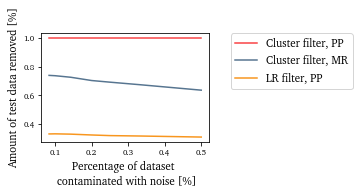

In [3]:
f, ax = plot_dict(results_removed_amount_of_data_amount_noise, percentage_x_axis = True)
ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Percentage of dataset \n contaminated with noise [%]', fontproperties = font)
f.savefig(figure_path + 'lung_data_higher_amount_noise_removed.pdf', bbox_inches='tight')

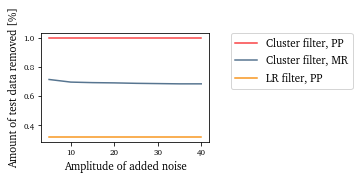

In [4]:
f, ax = plot_dict(results_removed_amount_of_data_amplitude_noise)
ax.set_ylabel(f'Amount of test data removed [%]', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
f.savefig(figure_path + 'lung_data_higher_amplitude_noise_removed.pdf', bbox_inches='tight')

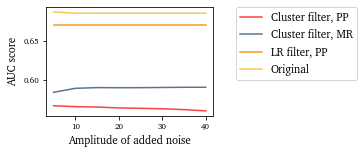

In [5]:
f, ax = plot_dict(results_amplitude)
ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Amplitude of added noise', fontproperties = font)
f.savefig(figure_path + 'lung_data_higher_amplitude_noise.pdf', bbox_inches='tight')

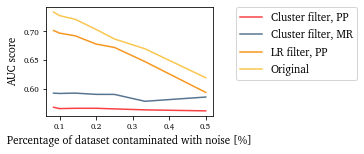

In [6]:
f, ax = plot_dict(results_amount, percentage_x_axis = True)
ax.set_ylabel(f'AUC score', fontproperties = font)
ax.set_xlabel('Percentage of dataset contaminated with noise [%]', fontproperties = font)
f.savefig(figure_path + 'lung_data_more_noise.pdf', bbox_inches='tight')